In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Chemins vers les répertoires de dataset
base_dir = '/content/drive/MyDrive/unzip_dataset/Normalized_Dataset'
train_dir = f"{base_dir}/Training"
test_dir = f"{base_dir}/Test"
val_dir = f"{base_dir}/Validation"

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
# Paramètres de chargement
batch_size = 32
img_height = 256  # hauteur d'image que vous souhaitez redimensionner
img_width = 256   # largeur d'image que vous souhaitez redimensionner

# Charger les ensembles d'entraînement, de validation et de test
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',           # Infère les labels à partir des sous-dossiers
    label_mode='categorical',            # Encode les labels sous forme de one-hot vecteur classe 2 : (0, 1, 0)
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

class_names = train_ds.class_names

Found 4977 files belonging to 3 classes.
Found 624 files belonging to 3 classes.
Found 622 files belonging to 3 classes.


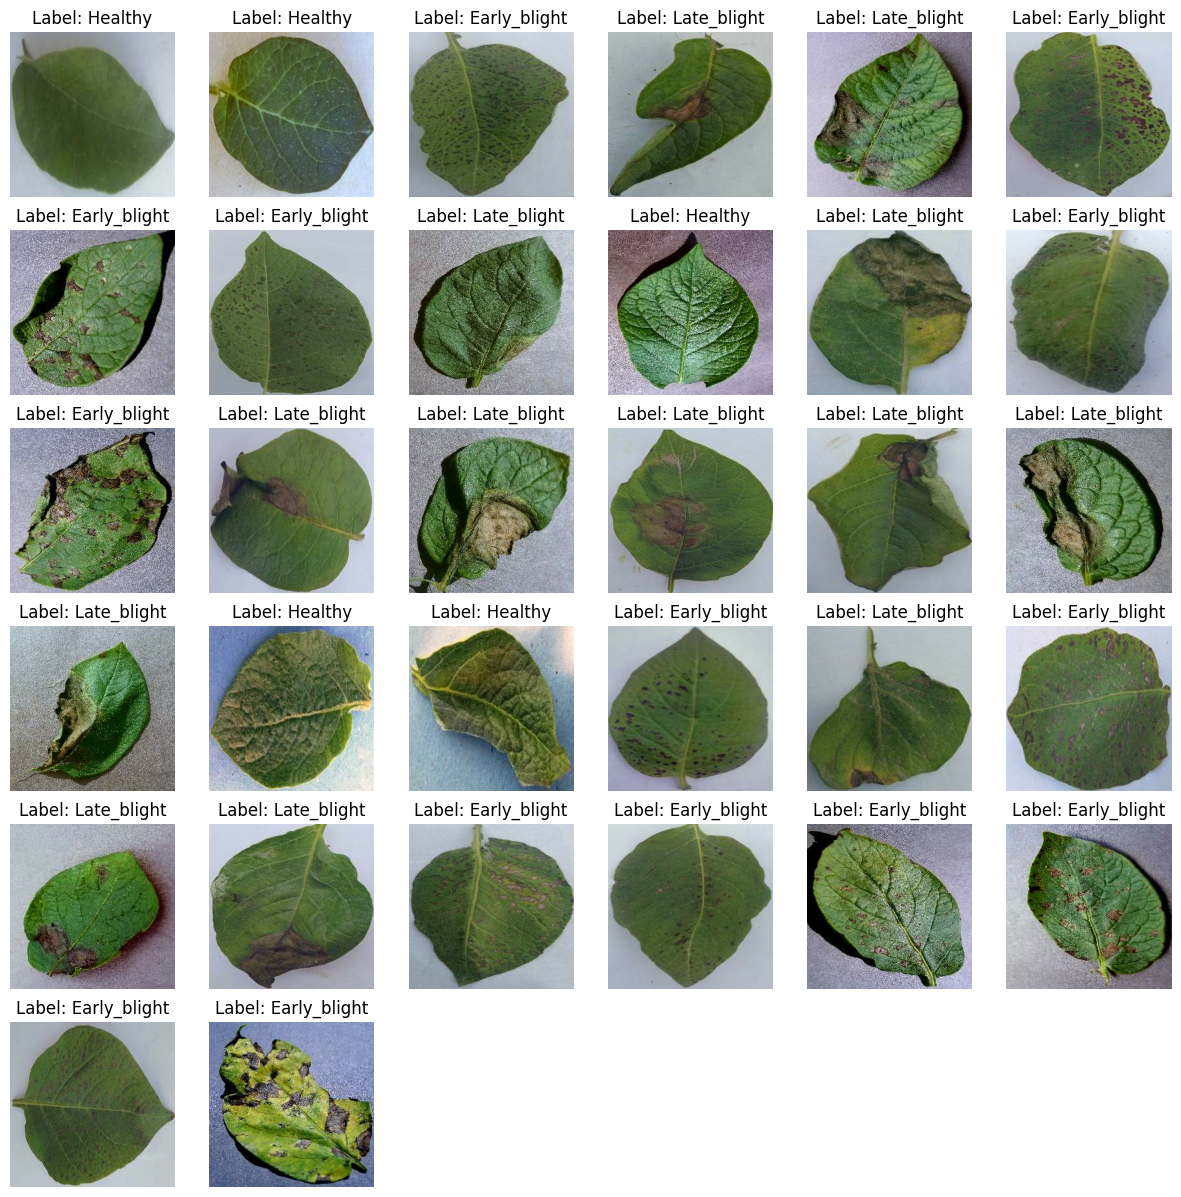

In [29]:
# Prendre un seul batch du dataset
for images, labels in train_ds.take(1):  # train_ds est votre dataset d'entraînement

    # Afficher chaque image et son label
    plt.figure(figsize=(15, 15))
    for i in range(batch_size):
        ax = plt.subplot(6, 6, i + 1)  # Créer une grille pour afficher les images (ajustez si nécessaire)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convertir en uint8 pour affichage
        label = labels[i].numpy()

        # Vérifier si le label est un one-hot vector, sinon l'afficher directement
        if len(label) > 1:
            label = tf.argmax(label).numpy()  # Récupérer l'indice du label si one-hot
        plt.title(f"Label: {class_names[label]}")
        plt.axis("off")  # Désactiver les axes pour une meilleure lisibilité

    plt.show()

In [30]:
import tensorflow as tf

# Liste des périphériques physiques disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print(f"TensorFlow utilise le GPU: {physical_devices}")
else:
    print("Aucun GPU n'a été trouvé. TensorFlow utilise le CPU.")


TensorFlow utilise le GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [31]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Appliquer la normalisation
norm_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
norm_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
norm_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [32]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

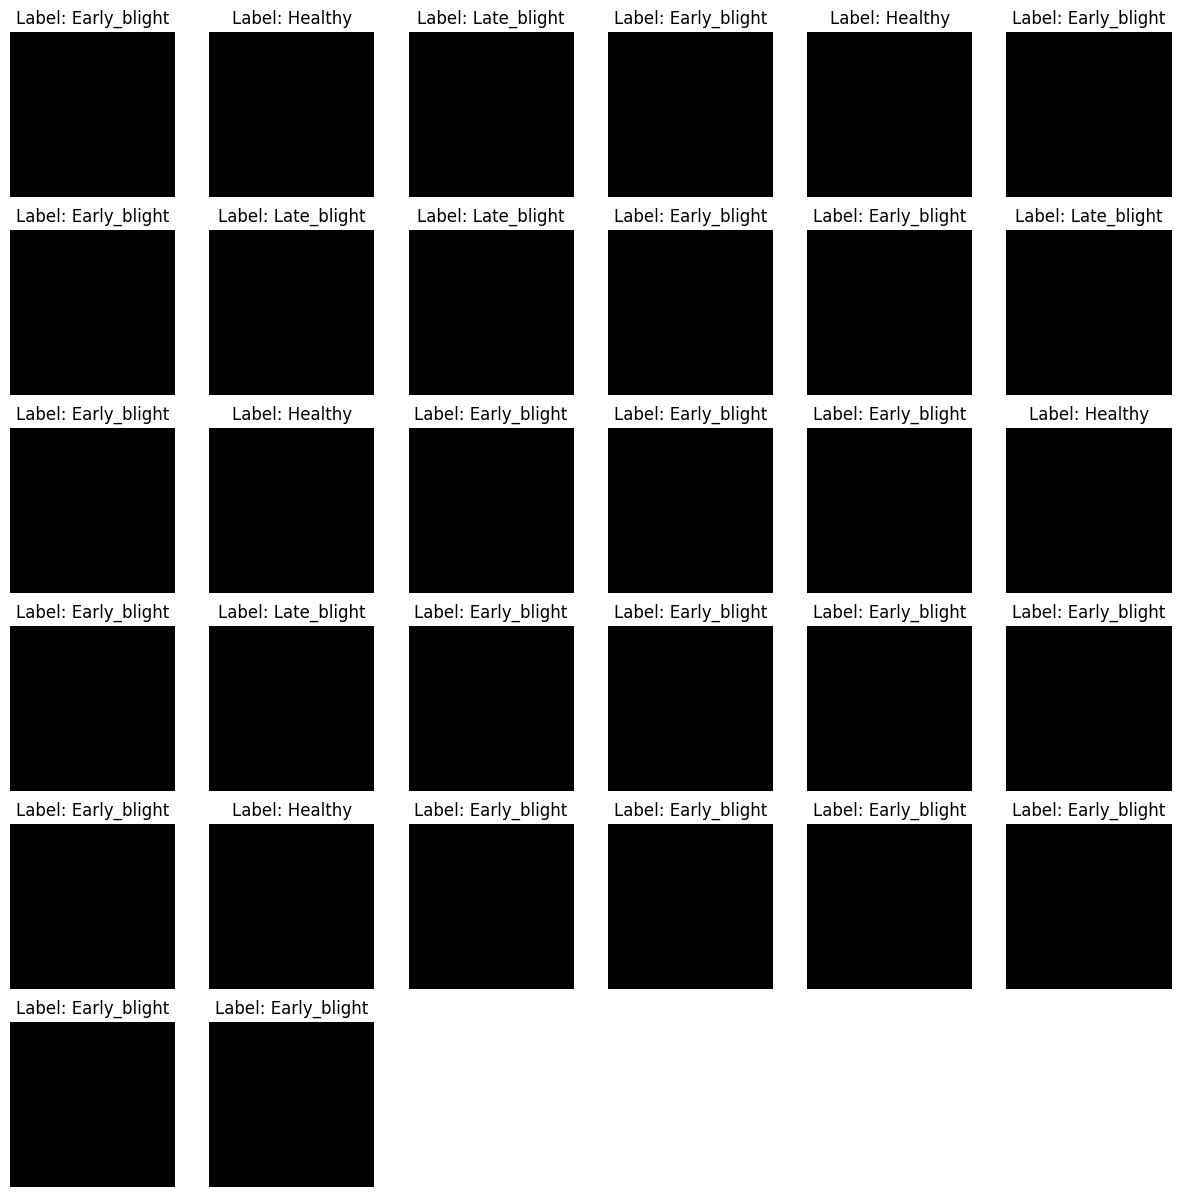

In [33]:
# Prendre un seul batch du dataset
for images, labels in norm_train_ds.take(1):  # train_ds est votre dataset d'entraînement

    # Afficher chaque image et son label
    plt.figure(figsize=(15, 15))
    for i in range(batch_size):
        ax = plt.subplot(6, 6, i + 1)  # Créer une grille pour afficher les images (ajustez si nécessaire)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convertir en uint8 pour affichage
        label = labels[i].numpy()

        # Vérifier si le label est un one-hot vector, sinon l'afficher directement
        if len(label) > 1:
            label = tf.argmax(label).numpy()  # Récupérer l'indice du label si one-hot
        plt.title(f"Label: {class_names[label]}")
        plt.axis("off")  # Désactiver les axes pour une meilleure lisibilité

    plt.show()

Architecture CNN

In [34]:
from tensorflow.keras import layers, models

# Définir le modèle CNN
def create_cnn_model(input_shape=(256, 256, 3), num_classes=3):
    model = models.Sequential()

    # Première couche de convolution + max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Deuxième couche de convolution + max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Troisieme couche de convolution + max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Couches denses (Fully connected)
    model.add(layers.Flatten())  # Aplatir l'entrée pour la couche dense
    model.add(layers.Dense(32, activation='relu'))  # Couche dense avec ReLU
    model.add(layers.Dropout(0.5))  # Dropout pour éviter le surapprentissage

    # Couche de sortie
    model.add(layers.Dense(num_classes, activation='softmax'))  # 3 classes avec activation softmax

    # Compiler le modèle
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Créer le modèle
model = create_cnn_model(input_shape=(256, 256, 3), num_classes=3)

# Afficher le résumé du modèle
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,068,099 (4.07 MB)

 Trainable params: 1,068,099 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Entraînement du modèle avec une barre de progression
history = model.fit(
    norm_train_ds,
    epochs=10,
    validation_data=norm_val_ds,
    verbose=1  # Affiche une barre de progression et les informations de perte et d'exactitude
)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.7237 - loss: 0.5633 - val_accuracy: 0.7260 - val_loss: 1.0327
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.7746 - loss: 0.4896 - val_accuracy: 0.8750 - val_loss: 0.4100
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.8483 - loss: 0.3572 - val_accuracy: 0.8510 - val_loss: 0.3797
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.8686 - loss: 0.3194 - val_accuracy: 0.8109 - val_loss: 0.7147
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.8869 - loss: 0.2827 - val_accuracy: 0.7837 - val_loss: 0.6222
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9066 - loss: 0.2289 - val_accuracy: 0.8830 - val_loss: 0.3977
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.9207 - loss: 0.2046 - val_accuracy: 0.8333 - val_loss: 0.6335
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9249 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


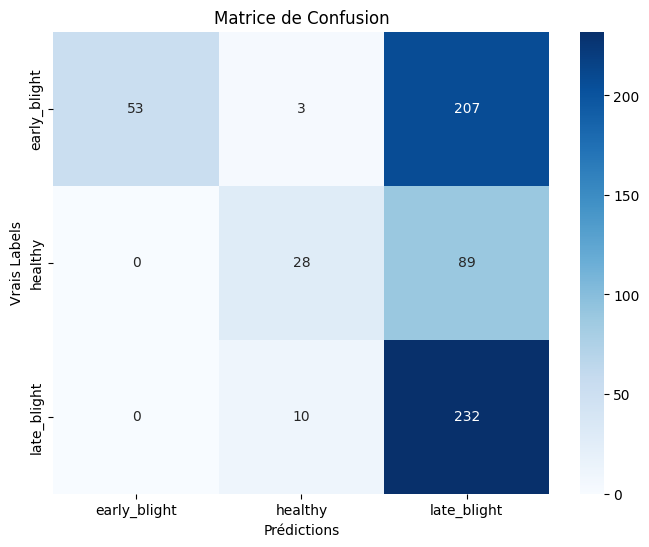

In [51]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Si vous avez un modèle entraîné, et que vous voulez générer la matrice de confusion sur test_ds
all_true_labels = []
all_pred_labels = []

# Parcourir tout le dataset de test
for images, labels in test_ds:
    # Faire des prédictions sur le batch d'images
    predictions = model.predict(images)
    # Obtenir les indices des classes prédites (l'index du maximum dans les prédictions)
    predicted_labels = np.argmax(predictions, axis=-1)

    # Obtenir les indices des classes réelles (les labels)
    true_labels = np.argmax(labels, axis=-1)

    # Ajouter les labels réels et prédits aux listes
    all_true_labels.extend(true_labels)
    all_pred_labels.extend(predicted_labels)

# Générer la matrice de confusion
cm = confusion_matrix(all_true_labels, all_pred_labels)

# Afficher la matrice de confusion
class_names = ['early_blight', 'healthy', 'late_blight']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()


In [42]:
# Prédictions pour un batch du dataset de test
predictions = model.predict(test_ds)

# Convertir les prédictions (probabilités) en indices de classe
predicted_classes = np.argmax(predictions, axis=-1)  # Prendre l'index du maximum (la classe prédite)

# Convertir les labels one-hot en indices de classe
true_classes = np.argmax(labels, axis=-1)  # Idem pour les labels vrais

# Affichage des résultats : affichage de l'écart
for i in range(5):  # Afficher quelques prédictions
    print(f"Vrai label: {true_classes[i]}, Prédiction: {predicted_classes[i]}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step
Vrai label: 0, Prédiction: 2
Vrai label: 2, Prédiction: 1
Vrai label: 0, Prédiction: 2
Vrai label: 0, Prédiction: 2
Vrai label: 0, Prédiction: 2


In [46]:
# Évaluation du modèle sur le dataset de test
test_loss, test_accuracy = model.evaluate(
    norm_test_ds,  # Dataset de test
    verbose=1  # Afficher la progression de l'évaluation
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9159 - loss: 0.2205
Test Loss: 0.19015318155288696
Test Accuracy: 0.9244372844696045


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


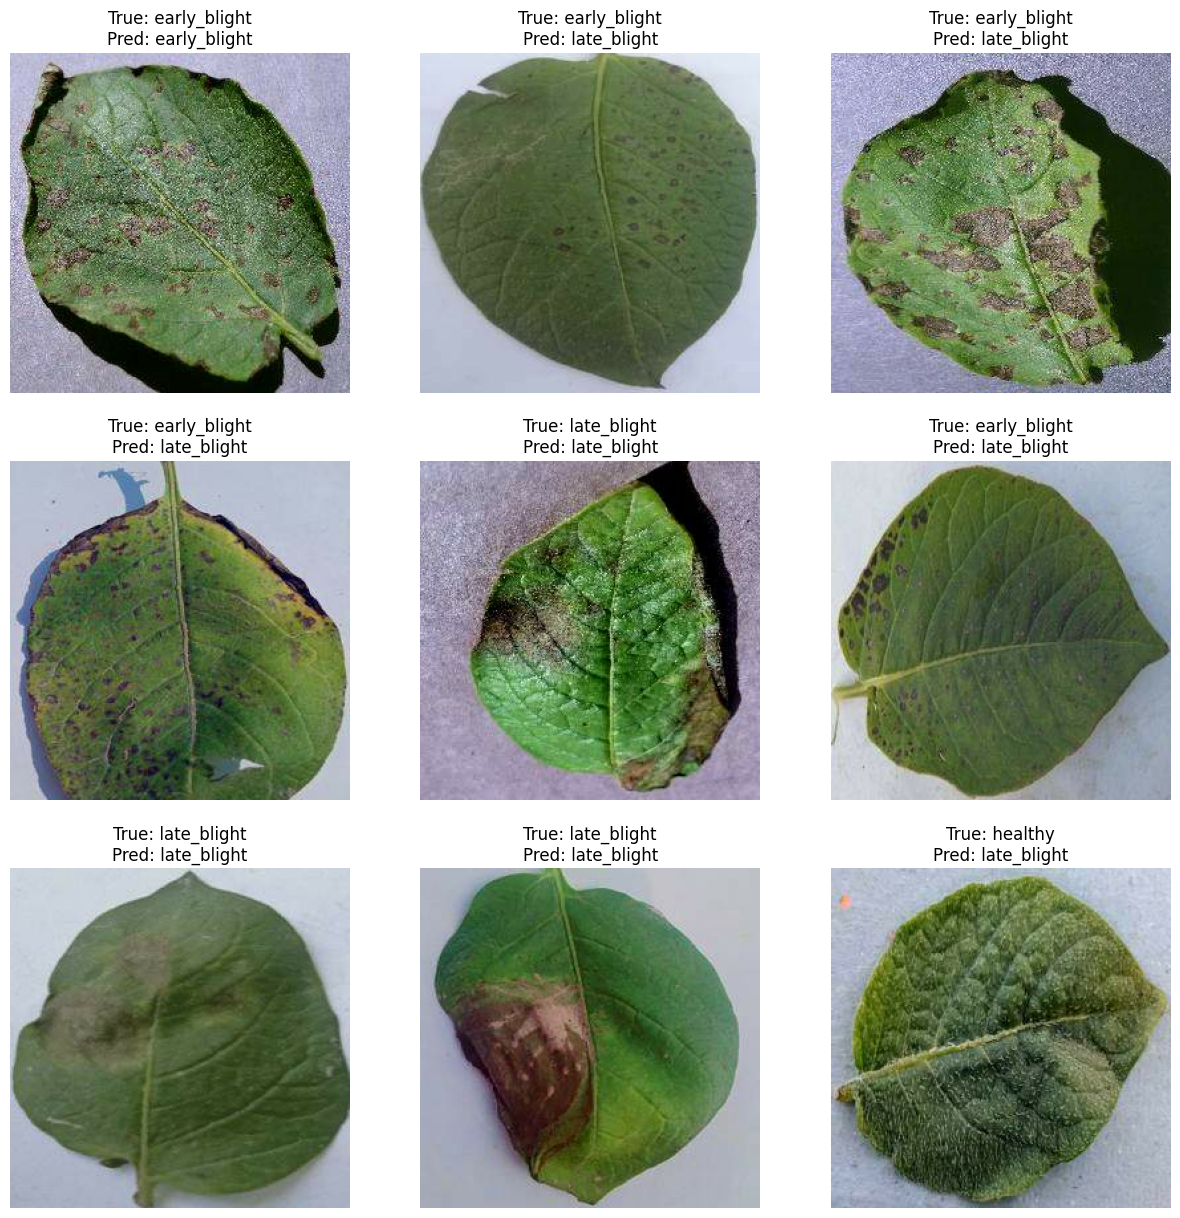

In [40]:
import numpy as np
# Récupérer quelques images du dataset de test
for images, labels in test_ds.take(1):  # Prenez le premier batch de test_ds
    # Faire des prédictions sur le batch d'images
    predictions = model.predict(images)

    # Obtenir les indices des classes prédites (l'index du maximum dans les prédictions)
    predicted_labels = np.argmax(predictions, axis=1)

    # Obtenir les indices des classes réelles (les labels)
    true_labels = np.argmax(labels, axis=1)

    # Afficher les images et leurs labels réels et prédits
    plt.figure(figsize=(15, 15))
    for i in range(9):  # Affiche 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convertir en uint8 pour un affichage correct
        plt.axis("off")

        # Récupérer le vrai label et le label prédit
        true_label = true_labels[i]
        predicted_label = predicted_labels[i]

        # Vous pouvez avoir un tableau des noms de classes si nécessaire
        class_names = ['early_blight', 'healthy', 'late_blight']  # Modifiez selon vos classes

        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")

    plt.show()
